# **Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Liz283/DataMining/main/heart.csv"
data = pd.read_csv(url)

# Define categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define the ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessing to the dataset, excluding the target variable if present
X_processed = preprocessor.fit_transform(data.drop(['target'], axis=1) if 'target' in data.columns else data)
y = data['target'] if 'target' in data.columns else None


# Parameter **Optimization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Define the parameter grid
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
random_states = [0, 42, 100]
n_estimators_list = [50, 100, 150]

best_accuracy = 0
best_params = {'test_size': None, 'random_state': None, 'n_estimators': None}

# Iterate over all combinations
for test_size in test_sizes:
    for random_state in random_states:
        for n_estimators in n_estimators_list:
            X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)
            rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
            rf_classifier.fit(X_train, y_train)
            y_pred_rf = rf_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_rf)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params['test_size'] = test_size
                best_params['random_state'] = random_state
                best_params['n_estimators'] = n_estimrs

# Print the best parameters and their accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Best Parameters: {'test_size': 0.1, 'random_state': 0, 'n_estimators': 50}
Best Accuracy: 1.0


# **Prediction**

Results for Random Forest:

               Predicted No Disease  Predicted Disease
Is No Disease                    55                  0
Is Disease                        0                 48

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        48

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103


Accuracy Score: 100.00%

Confusion Matrix:


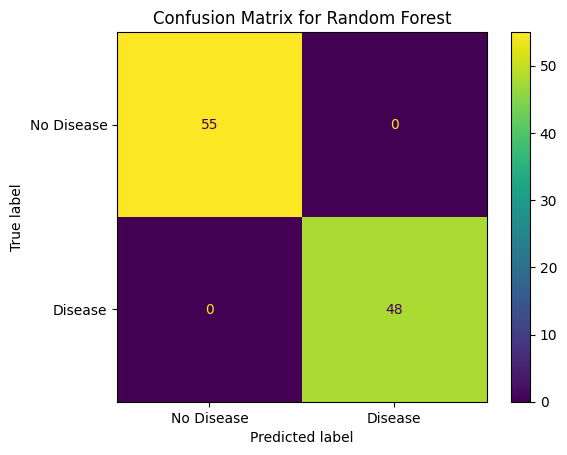

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.1, random_state = 0)

# Random Forest model
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
def print_rf_results(y_test, y_pred_rf, accuracy_rf):
    matrix_rf = confusion_matrix(y_test, y_pred_rf)
    label_names = ['No Disease', 'Disease']
    confusion_df_rf = pd.DataFrame(matrix_rf, columns=['Predicted ' + label for label in label_names], index=['Is ' + label for label in label_names])
    print("Results for Random Forest:\n")
    print(confusion_df_rf)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    print(f"\nAccuracy Score: {accuracy_rf*100:.2f}%")
    print("\nConfusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=label_names)
    plt.title('Confusion Matrix for Random Forest')
    plt.show()
print_rf_results(y_test, y_pred_rf, rf_accuracy)

# **Cross-validation Evaluation**

In [8]:
# Perform cross-validation to evaluate the model
cross_val_scores = cross_val_score(rf_classifier , X_processed, y, cv=5, scoring='accuracy')

cross_val_scores, cross_val_scores.mean(), cross_val_scores.std()

(array([1.        , 1.        , 1.        , 1.        , 0.98536585]),
 0.9970731707317073,
 0.005853658536585371)